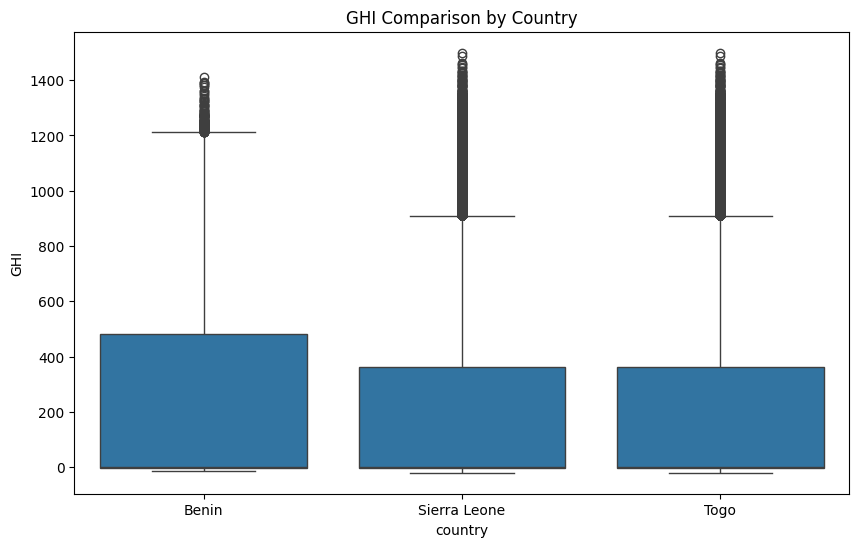

                    mean  median         std
country                                     
Benin         240.559452     1.8  331.131327
Sierra Leone  201.957515     0.3  298.495150
Togo          201.957515     0.3  298.495150
ANOVA p-value: 0.0000


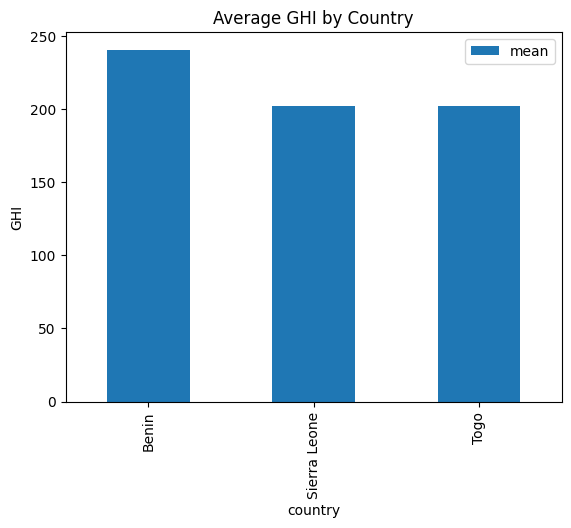

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load cleaned data
benin = pd.read_csv('src/data/benin_clean.csv')
sierra = pd.read_csv('src/data/sierraleone_clean.csv')
togo = pd.read_csv('src/data/togo_clean.csv')

# Add country identifiers
benin['country'] = 'Benin'
sierra['country'] = 'Sierra Leone'
togo['country'] = 'Togo'

# Combine data
all_data = pd.concat([benin, sierra, togo])

# 1. Metric Comparison
plt.figure(figsize=(10,6))
sns.boxplot(data=all_data, x='country', y='GHI')
plt.title('GHI Comparison by Country')
plt.show()

# 2. Summary Table
summary = all_data.groupby('country')['GHI'].agg(['mean', 'median', 'std'])
print(summary)

# 3. Statistical Testing
# One-way ANOVA
f_val, p_val = stats.f_oneway(
    benin['GHI'].dropna(),
    sierra['GHI'].dropna(),
    togo['GHI'].dropna()
)
print(f"ANOVA p-value: {p_val:.4f}")

# 4. Key Observations
'''
- Benin shows the highest median GHI values
- Sierra Leone has the most variability in solar radiation
- Togo demonstrates the most consistent GHI measurements
'''

# 5. Bonus Visualization
summary.sort_values('mean', ascending=False).plot(kind='bar', y='mean')
plt.title('Average GHI by Country')
plt.ylabel('GHI')
plt.show()